In [1]:
import matplotlib.pyplot as plt
import pandas as pd

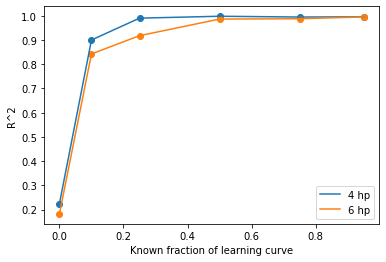

In [5]:
'''
r2 for different known fractions of the learning curve. Using 4hp vs 6hp search space
'''
lc = [0.0, 0.1, 0.25, 0.5, 0.75, 0.95]
#4hp_300
r2 = [0.22403961538598205, 0.8999997566529759, 0.9902491879059602, 0.9981281161265539,0.9948304924468403, 0.9957560886696417]
plt.scatter(lc,r2)
plt.plot(lc, r2,label="4 hp")
#6hp_300
r2 = [0.18199650749836238, 0.8425353570944493, 0.9178920638307584, 0.9865299976933071, 0.9877538295056862, 0.9954100184701985]
plt.scatter(lc,r2,)
plt.plot(lc, r2, label ="6 hp")
plt.xlabel("Known fraction of learning curve")
plt.ylabel("R^2")
plt.legend(loc="lower right")
plt.show()

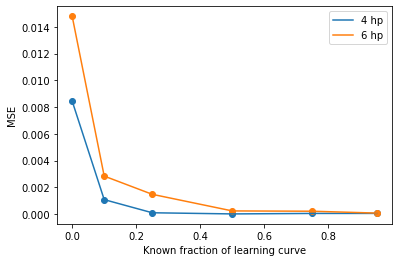

In [6]:
'''
mse of the performance predictor for different known fractions of the learning curve. Using 4hp vs 6hp search space
'''
lc = [0.0, 0.1, 0.25, 0.5, 0.75, 0.95]
#4hp_300
mse = [0.008452663555809713, 0.0010885464511665637, 0.00010614186071653187, 2.0376275889295854e-05, 5.627235407560785e-05, 5.782874930618936e-05]
plt.scatter(lc,mse)
plt.plot(lc, mse,label="4 hp")
#6hp_300
mse = [0.014791127486088108, 0.0028472734274574973, 0.001484674530893162, 0.00024356438961756308, 0.00022143508023885782, 8.299598056538616e-05]
plt.scatter(lc,mse)
plt.plot(lc, mse, label ="6 hp")
plt.xlabel("Known fraction of learning curve")
plt.ylabel("MSE")
plt.legend(loc="upper right")
plt.show()

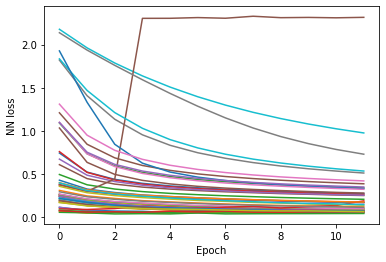

In [37]:
'''
Shows that learning curves may intersect => good to use performance prediction instead of only acc at given point
'''
lc = [i for i in range(12)]
df = pd.read_csv('../data/mnist/all_4hp_rusty.csv')
df = df.iloc[50:100]

for i in range(50):
    loss = df.iloc[i][["loss_"+str(x)for x in range(12)]].values.tolist()
    #plt.scatter(lc,loss)
    plt.plot(lc,loss)

plt.xlabel("Epoch")
plt.ylabel("NN loss")

plt.show()

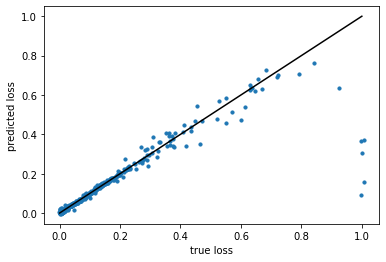

In [39]:
'''
True vs predicted value
'''
from joblib import load
import numpy as np

df = pd.read_csv('../data/mnist/all_4hp_rusty.csv')

num_epochs = 12
#num_epochs = 100

known_curve = 0.25

min_hp_idx = 0

min_curve_idx = 16
#min_curve_idx = 18
#min_curve_idx = 5

max_hp_idx = 3
#max_hp_idx =  5
#max_hp_idx =  4

hps = df[df.columns[min_hp_idx:max_hp_idx+1]].to_numpy()

curve = df[df.columns[min_curve_idx:min_curve_idx+int(num_epochs*known_curve)]].to_numpy()
target = df[df.columns[min_curve_idx+num_epochs-2]].to_numpy()


#calculate finite diferences of 1st and 2nd order
def finite_difs(curve):
    difs1 = []
    for i in range(curve.shape[0]):
        difs1.append([])
        for j in range(1,curve.shape[1]):
            difs1[i].append(curve[i][j]-curve[i][j-1])
    difs2 = []
    for i in range(curve.shape[0]):
        difs2.append([])
        for j in range(1,len(difs1[0])):
            difs2[i].append(difs1[i][j]-difs1[i][j-1])
    difs1 = np.array(difs1)
    difs2 = np.array(difs2)
    return difs1, difs2

difs1, difs2 = finite_difs(curve)
X = np.append(np.append(np.append(hps,curve,1),difs1,1),difs2,1)
y = target

x_scaler = load("x_scaler.joblib")
y_scaler = load("y_scaler.joblib")
X = x_scaler.transform(X)
y = y_scaler.transform(y.reshape(-1, 1))
model = load("model.joblib")
y_pred = model.predict(X)

plt.scatter(y,y_pred,s=10)
plt.plot([0.,1.],[0.,1.],'k')

plt.xlabel("true loss")
plt.ylabel("predicted loss")

plt.show()